# 1. EDA

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [ ]:
df = pd.read_csv('flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
43500,52523,3/4/2013,3/4/2013,Female,4,beijing,beijing,CN,28.0,3/31/2014,...,1486.0,6908,9/26/2013,188,51.500000,116,0,0.564839,3160,0
29667,40150,11/3/2009,11/24/2009,Male,4,shenzhen,guangdong,CN,44.0,3/31/2014,...,1622.0,8395,7/30/2013,246,57.714286,203,0,0.905678,8907,1
39211,33662,8/28/2012,8/28/2012,Male,4,dushanzi,xinjiang,CN,28.0,3/31/2014,...,0.0,5684,1/20/2013,437,145.000000,145,0,0.850000,3449,0
59084,52472,3/14/2013,3/14/2013,Male,4,dalian,liaoning,CN,44.0,3/31/2014,...,929.0,2022,3/12/2014,20,182.000000,195,0,0.697938,1000,0
41800,42336,7/10/2012,9/9/2012,Male,4,HONG KONG,HONG KONG,HK,41.0,3/31/2014,...,3410.0,5369,3/28/2014,4,47.166667,328,0,0.793077,5300,0


In [ ]:
#df[['BP_SUM', 'SUM_YR_1', 'SUM_YR_2']]

### Check Data INFO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Pada dataset Flight memiliki 23 feature yang berisi dari `5` type data `int`, `10` type data `float`, dan `8` type data `object`. Dataset memiliki `rangeindex 43308`


### Check Data NULL

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**Columns** yang memiliki **Data NULL** diantaranya adalah `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1` dan `SUM_YR_2`

### Check Data DUPLICATED

In [ ]:
df.duplicated().sum()

0

**Tidak ada** data yang duplikat

### Statistic Summary

In [ ]:
# Separate columns

num = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
cat = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
timestamp = ['FFP_DATE', 'FIRST_FlIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
df[num].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Pada Describe Numerikal ada beberapa feature yang memiliki nilai mediannya selisih jauh dengan nilai meannya, yaitu `Flight Count, BP Sum, Sum YR 1, Sum YR 2, Seg KM Sum, Last to End, Avg Interval, Max Interval, dan Point Sum`.


In [ ]:
df[cat].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


Pada feature categorikal yang memiliki unique banyak ya itu pada feature Work city, Work Province, dan Work Country karena terlalu banyaknya unique di feature `WORK_CITY`, `WORK_PROVINCE`, dan `WORK_COUNTRY`. kita akan mengambil 10 terbesar dari feature WORK_PROVINCE

In [ ]:
df = df.drop(columns = ['WORK_CITY', 'WORK_PROVINCE', 'MEMBER_NO'])
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


disini kita `membuang feature` yang tidak digunakan yaitu WORK_CITY, WORK_PROVINCE, dan MEMBER_NO. Kenapa kita membuang WORK_CITY dan WORK_PROVINCE karean unique terlalu banyak dan sebagai gantinya kita menggunakan perwakilan daerah dengan feature `WORK_COUNTRY`. Dan kenapa kita membuang feature MEMBER_NO karena feature ini tidak mempengaruhi proses modeling.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   GENDER             62985 non-null  object 
 3   FFP_TIER           62988 non-null  int64  
 4   WORK_COUNTRY       62962 non-null  object 
 5   AGE                62568 non-null  float64
 6   LOAD_TIME          62988 non-null  object 
 7   FLIGHT_COUNT       62988 non-null  int64  
 8   BP_SUM             62988 non-null  int64  
 9   SUM_YR_1           62437 non-null  float64
 10  SUM_YR_2           62850 non-null  float64
 11  SEG_KM_SUM         62988 non-null  int64  
 12  LAST_FLIGHT_DATE   62988 non-null  object 
 13  LAST_TO_END        62988 non-null  int64  
 14  AVG_INTERVAL       62988 non-null  float64
 15  MAX_INTERVAL       62988 non-null  int64  
 16  EXCHANGE_COUNT     629

Pada dataset Flight yang sudah di filter memiliki 20 feature yang berisi dari `9` type data `int`, `5` type data `float`, dan `6` type data `object`. Dataset memiliki `rangeindex 62988`.

In [ ]:
df.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_COUNTRY          26
AGE                  420
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

Pada Dataset Flight ini ada 4 feature yang memiliki nilai kosong atau nilai `null` yaitu di feature `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, dan `SUM_YR_2` 

### Value Counting

In [ ]:
cat = ['GENDER', 'WORK_COUNTRY']
num = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
date = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
df = df[df['WORK_COUNTRY'].isin(['CN', 'HK', 'JP', 'KR', 'US', 'TW', 'SG', 'AU', 'MY', 'PH'])]

In [ ]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
Male      47467
Female    14640
Name: GENDER, dtype: int64

Value count kolom WORK_COUNTRY:
CN    57748
HK      991
JP      875
KR      790
US      575
SG      281
TW      281
AU      271
MY      161
PH      137
Name: WORK_COUNTRY, dtype: int64



In [ ]:
for col in cat:
    print(f'''Nilai Unique dari count kolom {col}:''')
    print(df[col].unique())
    print()

Nilai Unique dari count kolom GENDER:
['Male' 'Female' nan]

Nilai Unique dari count kolom WORK_COUNTRY:
['CN' 'US' 'JP' 'HK' 'MY' 'AU' 'KR' 'SG' 'PH' 'TW']



### Individual Boxplot

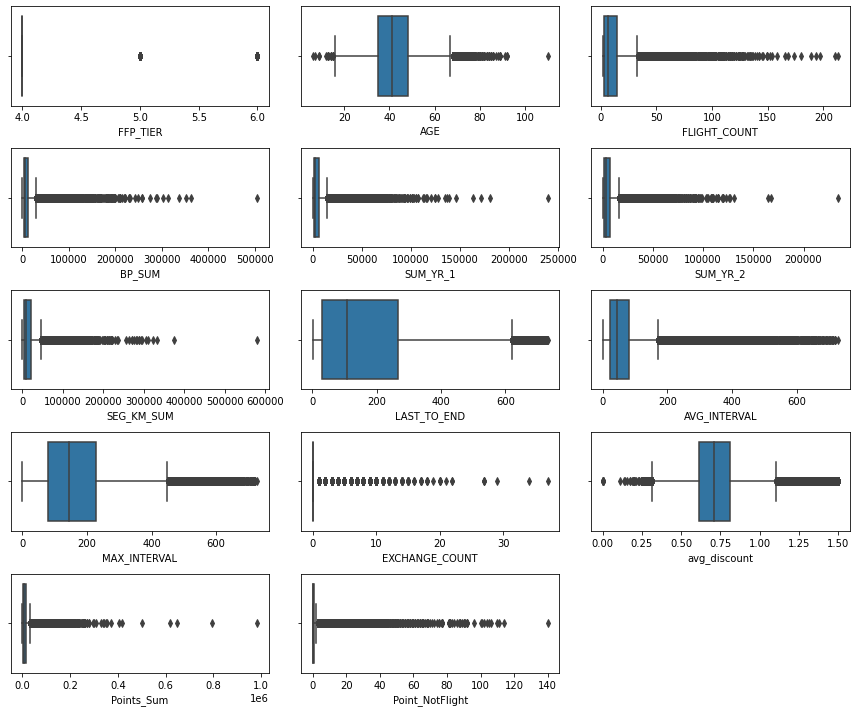

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num[i]], orient='h')
    plt.tight_layout()

Pada feature Numerikal hampir semua feature memiliki `outliers`, tetapi ada beberapa yang memilki outliers yang `extrime` yaitu FFP_Tier,  FLIGHT_COUNT , BP_Sum, Sum_YR_1, Sum_YR_2, Seg_KM_Sum, AVG_INTERNAL, Exchange_count, Point_Sum, dan Point_NotFlight

In [ ]:
#plt.figure(figsize=(12, 10))
#for i in range(0, len(num)):
    #plt.subplot(3, 5, i+1)
    #sns.boxplot(y=df[num[i]], orient='v')
    #plt.tight_layout()

### Individual Distplot

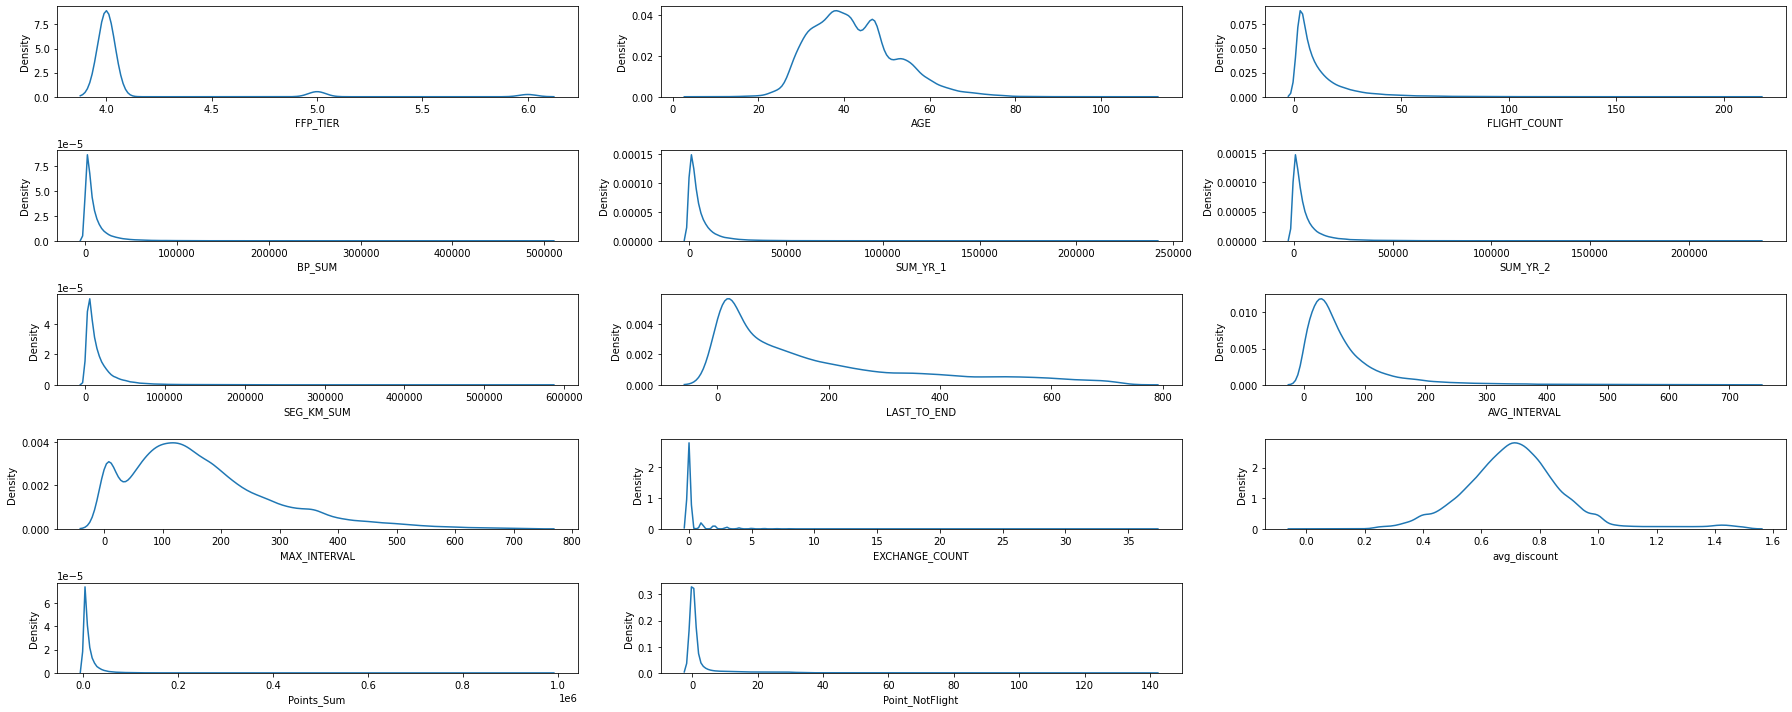

In [ ]:
plt.figure(figsize=(25, 10))
for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num[i]])
    plt.xlabel(num[i])
    plt.tight_layout()

Pada feature Age, avg_discount, dan Max interval dia memiliki Distribusi `Normal`, sedangkan yang lainnya memilki `Skewed Positif`

### Individual Violin Plots

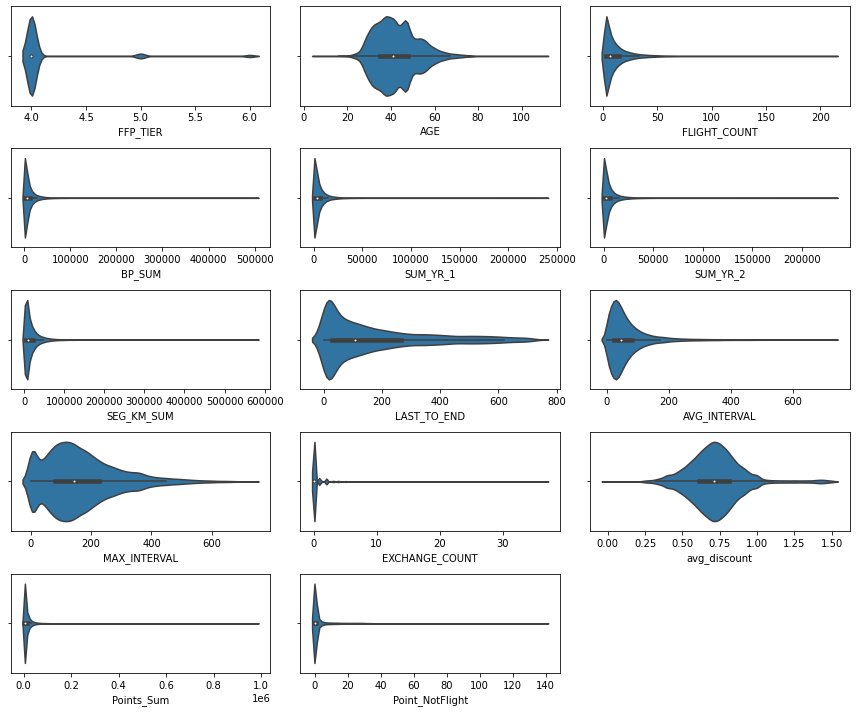

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.violinplot(x=df[num[i]], orient='h')
    plt.tight_layout()

### Correlation Heatmap 

In [ ]:
df[num].corr()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
FFP_TIER,1.000000,0.080853,0.583712,0.581815,0.461114,0.611584,0.521951,-0.206423,-0.145525,-0.128656,0.342469,0.250376,0.557674,0.192140
AGE,0.080853,1.000000,0.075089,0.103363,0.114259,0.085081,0.089517,-0.026923,-0.025110,0.009523,0.031998,0.133394,0.076873,-0.091453
FLIGHT_COUNT,0.583712,0.075089,1.000000,0.803406,0.754761,0.805250,0.862108,-0.404437,-0.317446,-0.190319,0.509179,0.142051,0.757655,0.291603
BP_SUM,0.581815,0.103363,0.803406,1.000000,0.855499,0.886360,0.921584,-0.323486,-0.251490,-0.152148,0.539234,0.312203,0.920790,0.249197
SUM_YR_1,0.461114,0.114259,0.754761,0.855499,1.000000,0.661286,0.807783,-0.187226,-0.245299,-0.147021,0.495330,0.271106,0.790284,0.237404
SUM_YR_2,0.611584,0.085081,0.805250,0.886360,0.661286,1.000000,0.852125,-0.426777,-0.249662,-0.158502,0.473734,0.236524,0.825710,0.241006
SEG_KM_SUM,0.521951,0.089517,0.862108,0.921584,0.807783,0.852125,1.000000,-0.373272,-0.284565,-0.158956,0.515452,0.110687,0.850546,0.263620
LAST_TO_END,-0.206423,-0.026923,-0.404437,-0.323486,-0.187226,-0.426777,-0.373272,1.000000,-0.107084,-0.342157,-0.171628,-0.022252,-0.294522,-0.123510
AVG_INTERVAL,-0.145525,-0.025110,-0.317446,-0.251490,-0.245299,-0.249662,-0.284565,-0.107084,1.000000,0.724150,-0.132043,-0.040678,-0.223990,-0.076156
MAX_INTERVAL,-0.128656,0.009523,-0.190319,-0.152148,-0.147021,-0.158502,-0.158956,-0.342157,0.724150,1.000000,-0.091421,-0.017519,-0.139219,-0.043396


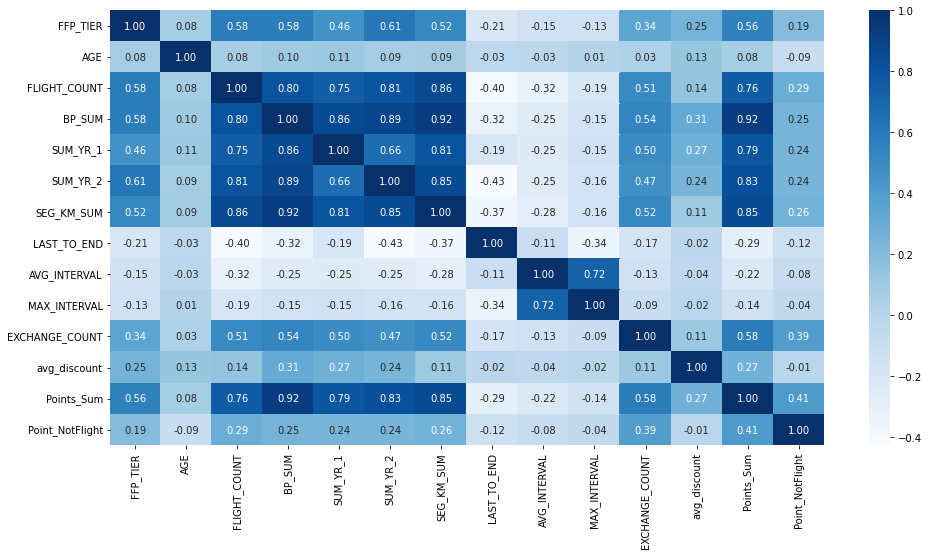

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df[num].corr(), cmap='Blues', annot=True, fmt='.2f')

### Pair Plots

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(df[num], diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.columns

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER', 'WORK_COUNTRY',
       'AGE', 'LOAD_TIME', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL',
       'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum',
       'Point_NotFlight'],
      dtype='object')

# 2. Feature Engineering

Fitur yang digunakan :
<br>1. FLIGHT_COUNT (jumlah penerbangan Customer mempengruhi loyalitas customer)
<br>2. SUM_YR_1 (Pendapatan yang dihasilkan penumpang dapat dijadikan bahan pertimbangan business recommendation)
<br>3. SEG_KM_SUM (Total jarak(km) penerbangan yg sudah dilakukan tidak menentukan banyaknya jumlah penerbangan Customer)
<br>4. Points_Sum (mengetahui point yang didapatkan per customer)
<br>5. Point_NotFlight (untuk bahan pertimbangan penyebab point tidak digunakan )
<br>6. avg_discount (mengetahui rata-rata diskon yang didapat customer)


In [ ]:
df_filter =df[['FLIGHT_COUNT','SUM_YR_1','SEG_KM_SUM','Points_Sum','Point_NotFlight','avg_discount']].copy()
df_filter.sample(5)

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM,Points_Sum,Point_NotFlight,avg_discount
53591,2,1122.0,3780,3615,11,0.587746
8009,22,4689.0,30951,24469,0,0.824468
17532,11,8833.0,20722,12671,12,0.671330
53559,2,1447.0,3793,1696,0,0.586385
16014,18,8789.0,20151,11010,0,0.747928


In [ ]:
df_filter.isna().sum()

FLIGHT_COUNT         0
SUM_YR_1           548
SEG_KM_SUM           0
Points_Sum           0
Point_NotFlight      0
avg_discount         0
dtype: int64

In [ ]:
# imputasi kolom numerikal dengan nilai rata-rata
df_filter['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)

df_filter.isna().sum()

FLIGHT_COUNT       0
SUM_YR_1           0
SEG_KM_SUM         0
Points_Sum         0
Point_NotFlight    0
avg_discount       0
dtype: int64

In [ ]:
# drop missing value
df_filter.dropna(inplace=True)
df_filter.isna().sum()

FLIGHT_COUNT       0
SUM_YR_1           0
SEG_KM_SUM         0
Points_Sum         0
Point_NotFlight    0
avg_discount       0
dtype: int64

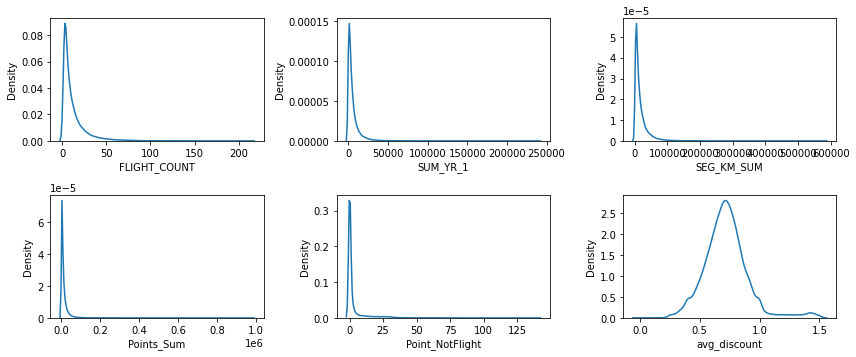

In [ ]:
nums = ['FLIGHT_COUNT','SUM_YR_1','SEG_KM_SUM','Points_Sum','Point_NotFlight','avg_discount']
plt.figure(figsize=(12, 12))
for i in range(0, len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_filter[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

## Standardization

In [ ]:
df_filter.columns

Index(['FLIGHT_COUNT', 'SUM_YR_1', 'SEG_KM_SUM', 'Points_Sum',
       'Point_NotFlight', 'avg_discount'],
      dtype='object')

In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62110 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FLIGHT_COUNT     62110 non-null  int64  
 1   SUM_YR_1         62110 non-null  float64
 2   SEG_KM_SUM       62110 non-null  int64  
 3   Points_Sum       62110 non-null  int64  
 4   Point_NotFlight  62110 non-null  int64  
 5   avg_discount     62110 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 5.3 MB


In [ ]:
feats = ['FLIGHT_COUNT', 'SUM_YR_1', 'SEG_KM_SUM', 'Points_Sum',
       'Point_NotFlight', 'avg_discount']
X = df_filter[feats].values


from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM,Points_Sum,Point_NotFlight,avg_discount
count,6.211000e+04,6.211000e+04,6.211000e+04,6.211000e+04,6.211000e+04,6.211000e+04
mean,6.589480e-17,-1.317896e-16,-1.464329e-16,-5.857316e-17,1.647370e-17,2.855441e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-7.011190e-01,-6.667502e-01,-8.079982e-01,-6.183232e-01,-3.728427e-01,-3.898315e+00
25%,-6.301867e-01,-5.398072e-01,-5.954608e-01,-4.806908e-01,-3.728427e-01,-5.906491e-01
50%,-3.464573e-01,-3.122585e-01,-3.411643e-01,-3.045338e-01,-3.728427e-01,-5.015551e-02
75%,2.210015e-01,1.475509e-01,2.030231e-01,8.926178e-02,-2.377125e-01,4.752374e-01
max,1.426561e+01,2.923537e+01,2.730663e+01,4.815349e+01,1.854538e+01,4.210403e+00


In [ ]:
new_df.head()

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM,Points_Sum,Point_NotFlight,avg_discount
0,14.052809,29.235371,27.306629,30.050991,6.383667,1.300125
1,9.087544,20.737931,13.401213,19.956285,4.086453,2.871462
2,8.732883,19.756214,12.918416,19.490773,3.140542,2.884225
3,0.788460,13.856174,12.803313,17.800486,1.248720,1.998721
4,9.938733,14.880955,14.188433,16.148106,4.897235,1.348879


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62110 entries, 0 to 62109
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FLIGHT_COUNT     62110 non-null  float64
 1   SUM_YR_1         62110 non-null  float64
 2   SEG_KM_SUM       62110 non-null  float64
 3   Points_Sum       62110 non-null  float64
 4   Point_NotFlight  62110 non-null  float64
 5   avg_discount     62110 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


# 3. Modeling dan Evaluasi

### Elbow Method

In [ ]:
new_df.isna().sum()

FLIGHT_COUNT       0
SUM_YR_1           0
SEG_KM_SUM         0
Points_Sum         0
Point_NotFlight    0
avg_discount       0
dtype: int64

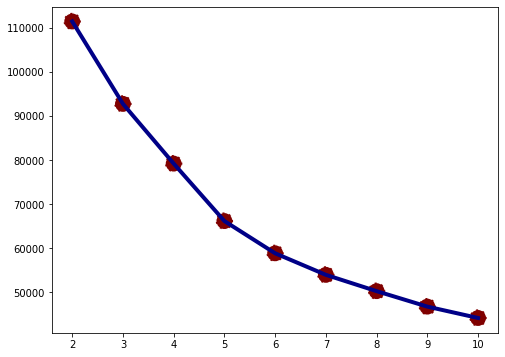

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(8, 6))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Dari hasil elbow method terlihat bahwa setelah cluster ke-6, inersia tidak turun secara signifikan. Oleh karena itu, jumlah cluster terbaik yang bisa digunakan adalah 6 clusters. Namun, karena penurunan inersia pada plot di atas saat clusters 5 dan 6 kurang terlihat jelas. Di bawah ini akan dilihat silhoutte score dari model clustering, untuk menentukan jumlah cluster terbaik.

### Silhoute Score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,random_state=0).fit(new_df)
    preds = kmeans.predict(new_df)
     
    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

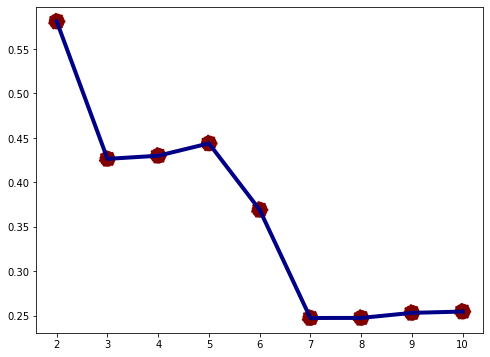

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

### Fit Clustering

In [ ]:
# 4 clusters
from sklearn.cluster import KMeans
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(new_df.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# 5 clusters
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans5.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

### Hasil dan Visualisasi Clustering

In [ ]:
df_filter['cluster']=kmeans5.labels_
df_filter

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM,Points_Sum,Point_NotFlight,avg_discount,cluster
0,210.0,239560.0,580717.0,619760.0,50.0,0.961639,4
1,140.0,171483.0,293678.0,415768.0,33.0,1.252314,4
2,135.0,163618.0,283712.0,406361.0,26.0,1.254676,4
3,23.0,116350.0,281336.0,372204.0,12.0,1.090870,4
4,152.0,124560.0,309928.0,338813.0,39.0,0.970658,4
...,...,...,...,...,...,...,...
28414,11.0,6955.0,9684.0,7310.0,1.0,0.831991,1
28415,8.0,6415.0,11261.0,10487.0,11.0,0.715461,1
28416,7.0,0.0,7025.0,7745.0,0.0,1.146760,3
28417,10.0,7478.0,13286.0,15416.0,5.0,0.606344,1


In [ ]:
df_filter.groupby('cluster').agg(['mean','median','std'])

FLIGHT_COUNT                        SUM_YR_1                         \
                mean median        std          mean   median           std   
cluster                                                                       
0          39.652165   38.0  14.525107  17675.249616  16688.0   8171.579729   
1          14.423897   13.0   6.772861   5938.988689   5525.0   3948.408673   
2          23.180373   20.0  13.673885   9409.627723   8058.0   6613.595157   
3          14.788671   12.0  10.330558  11811.428068   9495.0   9732.085346   
4          72.983193   72.0  31.097701  46756.106843  41670.0  23350.331892   

            SEG_KM_SUM                             Points_Sum            \
                  mean    median           std           mean    median   
cluster                                                                   
0         56889.065690   52956.0  18433.664507   39562.979539   36009.0   
1         21728.920396   19617.0   8995.553110   13346.851061   11823.0   
2         31036.535636   26523.5  16623.438683   32979.345395   27045.0   
3         22373.224946   18433.0  13966.725423   28448.926471   22763.5   
4        119884.626651  111807.0  47619.850719  125823.130852  107518.0   

                      Point_NotFlight                   avg_discount  \
                  std            mean median        std         mean   
cluster                                                                
0        15242.390629        3.607797    2.0   4.603279     0.749925   
1         6171.922787        1.070943    0.0   2.493066     0.719457   
2        20463.624255       28.608004   27.0  11.302375     0.714369   
3        19546.274441        1.805011    0.0   3.306355     1.238838   
4        64229.634495       17.418968   11.0  18.072596     0.926024   

                             
           median       std  
cluster                      
0        0.743889  0.105129  
1        0.718888  0.108428  
2        0.708680  0.116592  
3        1.248133  0.163973  
4        0.837062  0.242612

In [ ]:
new_df.describe()

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM,Points_Sum,Point_NotFlight,avg_discount
count,2.841900e+04,2.841900e+04,2.841900e+04,2.841900e+04,2.841900e+04,2.841900e+04
mean,9.600915e-17,-1.280122e-16,-3.200305e-17,3.200305e-17,8.000763e-18,-9.200877e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.124466e+00,-9.338243e-01,-1.032697e+00,-9.000117e-01,-4.324091e-01,-2.409056e+00
25%,-6.471789e-01,-5.649358e-01,-6.088332e-01,-5.120306e-01,-4.324091e-01,-5.883160e-01
50%,-2.892140e-01,-2.539823e-01,-3.176291e-01,-3.102882e-01,-4.324091e-01,-1.634971e-01
75%,3.073942e-01,2.210075e-01,2.512705e-01,1.194440e-01,-8.917354e-02,3.101958e-01
max,1.146397e+01,2.223632e+01,2.223374e+01,3.000628e+01,1.558525e+01,4.182757e+00


### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(new_df)
pcs = pca.transform(new_df)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2','PC 3'])
data_pca['cluster'] = df_filter['cluster']
data_pca.head()

,PC 1,PC 2,PC 3,cluster
0,39.580952,0.187166,-5.344034,4
1,24.626941,-2.581193,-2.143158,4
2,23.550610,-2.801929,-2.589990,4
3,17.112858,-2.680589,-2.440559,4
4,21.634889,0.286058,-1.641091,4


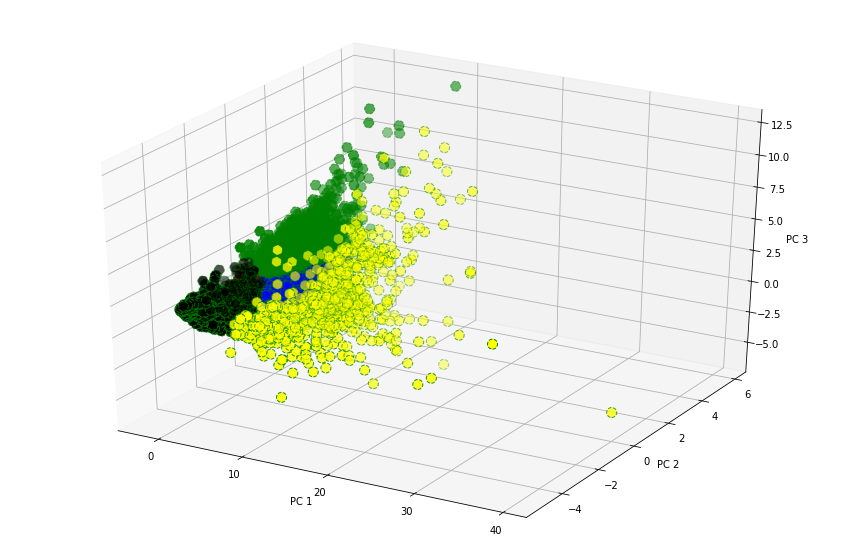

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC 1'][data_pca.cluster == 0], data_pca["PC 2"][data_pca.cluster == 0], data_pca["PC 3"][data_pca.cluster == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.cluster == 1], data_pca["PC 2"][data_pca.cluster == 1], data_pca["PC 3"][data_pca.cluster == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.cluster == 2], data_pca["PC 2"][data_pca.cluster == 2], data_pca["PC 3"][data_pca.cluster == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.cluster == 3], data_pca["PC 2"][data_pca.cluster == 3], data_pca["PC 3"][data_pca.cluster == 3], c='black', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.cluster == 4], data_pca["PC 2"][data_pca.cluster == 4], data_pca["PC 3"][data_pca.cluster == 4], c='yellow', s=100, edgecolor='green',linestyle='--')


plt.xlabel("PC 1")
plt.ylabel("PC 2")
ax.set_zlabel('PC 3')
plt.show()

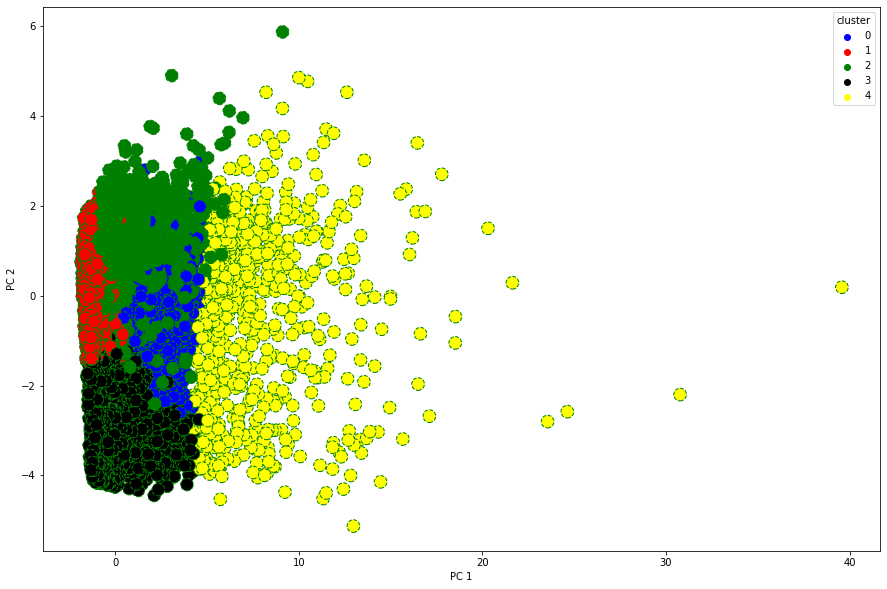

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black','yellow'],
    s=160,
    ax=ax
)

### Evaluasi Clustering

# 4. Interpretasi Model + Rekomendasi